In [13]:
import pandas as pd

In [14]:
df = pd.read_csv("Austenitic stainless steels(315).csv")
df.head()

,Steel Condition,Tensile Strength (MPa),Tensile Strength (ksi),Yield Strength (MPa),Yield Strength (ksi),Elongation in 50 mm (%),Reduction in Area (%),Hardness (HB)
0,347 Annealed sheet,655,95,275,40,45,...,85 HRB
1,347 Annealed bar,620,90,240,35,50,65,160
2,384 Annealed and cold drawn bar,690,100,450,65,40,60,212
3,384 Annealed wire 1040 °C (1900 °F),515,75,240,35,55,72,70 HRB
4,304 Annealed bar,585,85,235,34,60,70,149


In [15]:
df['YS/TS Ratio'] = df['Yield Strength (MPa)'] / df['Tensile Strength (MPa)']
df.head()

,Steel Condition,Tensile Strength (MPa),Tensile Strength (ksi),Yield Strength (MPa),Yield Strength (ksi),Elongation in 50 mm (%),Reduction in Area (%),Hardness (HB),YS/TS Ratio
0,347 Annealed sheet,655,95,275,40,45,...,85 HRB,0.419847
1,347 Annealed bar,620,90,240,35,50,65,160,0.387097
2,384 Annealed and cold drawn bar,690,100,450,65,40,60,212,0.652174
3,384 Annealed wire 1040 °C (1900 °F),515,75,240,35,55,72,70 HRB,0.466019
4,304 Annealed bar,585,85,235,34,60,70,149,0.401709


<Axes: title={'center': 'YS/TS Ratio vs Hardness'}, xlabel='Hardness (HB)', ylabel='YS/TS Ratio'>

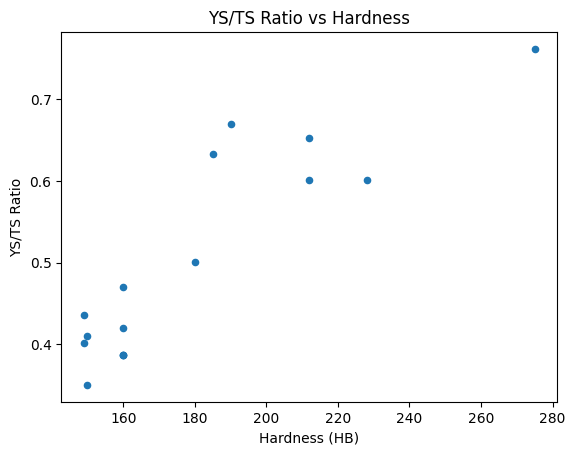

In [16]:

df['Hardness (HB)'] = pd.to_numeric(df['Hardness (HB)'], errors='coerce')
df_cleaned = df.dropna(subset=['Hardness (HB)', 'YS/TS Ratio'])
df_cleaned.plot(x='Hardness (HB)', y='YS/TS Ratio', kind='scatter', title='YS/TS Ratio vs Hardness')

In [23]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare the data
X = df_cleaned[['Yield Strength (MPa)', 'YS/TS Ratio', 'Tensile Strength (MPa)']].values
y = df_cleaned['Hardness (HB)'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse')


/opt/anaconda3/envs/Python-mediapipe-0-10-9/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:

# Train the model
history = model.fit(X_train, y_train, epochs=300, batch_size=8, verbose=0)


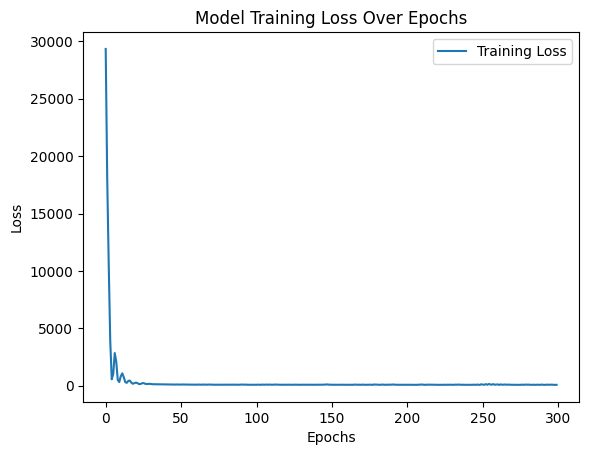

In [25]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Loss Over Epochs')
plt.legend()
plt.show()

In [26]:

# Predict on the test set
y_pred = model.predict(X_test).flatten()

# Compute MSE
mse = mean_squared_error(y_test, y_pred)

# Compute R-squared
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Mean Squared Error (MSE): 20.779122513195034
R-squared (R²): 0.9648258611710622


In [28]:
# Predict on the training set
y_train_pred = model.predict(X_train).flatten()

# Compute R-squared for training data
r2_train = r2_score(y_train, y_train_pred)

print(f"R-squared (R²) for Training Data: {r2_train}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
R-squared (R²) for Training Data: 0.9443412380611779


In [27]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_rf_pred = rf_model.predict(X_test)

# Compute R-squared
r2_rf = r2_score(y_test, y_rf_pred)

print(f"R-squared (R²) for Random Forest: {r2_rf}")

R-squared (R²) for Random Forest: 0.9832843372360934
